Merging dataframes

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy

df1 = pd.read_csv('/Users/ruthwetters/Downloads/EThOS_CSV_202007.csv')
df2 = pd.read_table('/Users/ruthwetters/Downloads/EThOS_DDC.txt', header=None)
df2.columns = ['EThOS ID','Dewey class']

In [4]:
df = pd.merge(df1,df2,left_index=True,right_index=True)

In [5]:
df

,Title,DOI,Author,Author ISNI,ORCID,Institution,Institutional ISNI,Date,Qualification,Abstract,Subject discipline,Supervisor(s),Funder(s),EThOS URL,IR URL,EThOS ID,Dewey class
0,Computation and measurement of turbulent flow ...,NaN,"Loizou, Panos A.",https://isni.org/isni/0000000136122593,NaN,University of Manchester,https://isni.org/isni/0000000121662407,1989.0,Thesis (Ph.D.),NaN,Physical Sciences,NaN,NaN,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,NaN,232781,532
1,Prolactin and growth hormone secretion in norm...,NaN,"Prescott, R. W. G.",https://isni.org/isni/0000000134992122,NaN,University of Newcastle upon Tyne,https://isni.org/isni/0000000104627212,1983.0,Thesis (Ph.D.),NaN,Biological Sciences,NaN,NaN,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,NaN,232784,572
2,Influence of strain fields on flame propagation,NaN,"Mendes-Lopes, J. M. C.",https://isni.org/isni/0000000133937105,NaN,University of Cambridge,https://isni.org/isni/0000000121885934,1983.0,Thesis (Ph.D.),Flame propagation can be highly influenced by ...,Engineering & Technology,NaN,NaN,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,NaN,232785,621.43
3,"Connectivity, flow and transport in network mo...",NaN,"Robinson, Peter Clive",https://isni.org/isni/0000000135292822,NaN,University of Oxford,https://isni.org/isni/0000000419368948,1984.0,Thesis (Ph.D.),In order to evaluate the safety of radioactive...,Physical Sciences,"Rae, John",NaN,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,http://ora.ox.ac.uk/objects/uuid:c61bf73b-b794...,232786,551
4,The theory and implementation of a high qualit...,NaN,"Lower, K. N.",https://isni.org/isni/0000000136133567,NaN,University of Bristol,https://isni.org/isni/0000000419367603,1985.0,Thesis (Ph.D.),NaN,Engineering & Technology,NaN,NaN,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,NaN,232787,621.31042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516518,Silence among Afro Caribbean men diagnosed wit...,https://doi.org/10.15126/thesis.00850017,"King-Okoye, Michelle",https://isni.org/isni/0000000476573104,NaN,University of Surrey,https://isni.org/isni/0000000404074824,2018.0,Thesis (Ph.D.),Background: Prostate cancer (PCa) is the leadi...,Medicine & Health,"Faithfull, Sara ; Arber, Anne","Scholarship and Advanced Training Division, Mi...",https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,http://epubs.surrey.ac.uk/850017/,812764,616.34079
516519,Synthesis and characterisation of peptide-poly...,https://doi.org/10.15126/thesis.00850019,"Mai, Cuc",https://isni.org/isni/0000000476573155,NaN,University of Surrey,https://isni.org/isni/0000000404074824,2018.0,Thesis (Ph.D.),"This study involved two separate projects, bot...",Physical Sciences,"Whelligan, Daniel",University of Surrey,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,http://epubs.surrey.ac.uk/850019/,813469,546
516520,Physical activity behaviour change : supportin...,https://doi.org/10.15126/thesis.00850020,"Webb, Justin",NaN,NaN,University of Surrey,https://isni.org/isni/0000000404074824,2018.0,Thesis (Ph.D.),This thesis is presented in five chapters. Cha...,"Philosophy, Psychology & Religious Studies",NaN,NaN,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,http://epubs.surrey.ac.uk/850020/,814575,331
516521,Progressive collapse analysis of reinforced co...,https://doi.org/10.15126/thesis.00850029,"Ulaeto, Nsikak",https://isni.org/isni/0000000476573286,NaN,University of Surrey,https://isni.org/isni/0000000404074824,2018.0,Thesis (Ph.D.),Flat slabs are reinforced concrete slabs suppo...,Engineering & Technology,"Sagaseta, Juan ; Chryssanthopoulos, Marios",Commonwealth Scholarship Commission,https://ethos.bl.uk/OrderDetails.do?uin=uk.bl....,http://epubs.surrey.ac.uk/850029/,815843,610


Cleaning data: identifying zero values, removing superfluous columns

In [6]:
pd.isnull(df).sum()

Title                      0
DOI                   499584
Author                     4
Author ISNI           107059
ORCID                 514423
Institution                4
Institutional ISNI         4
Date                       9
Qualification           4374
Abstract              253361
Subject discipline     27267
Supervisor(s)         422291
Funder(s)             477944
EThOS URL                  8
IR URL                246006
EThOS ID                   0
Dewey class                0
dtype: int64

We can see that the columns DOI and ORCID are mostly NaN values. I was originally planning to investigate the Supervisor and Funder info, but I will take those out too as they are not relevant to my analysis. I will also remove IR URL, Author ISNI and Institution ISNI, to create a dataframe with 8 attributes

In [7]:
df = df.drop(labels={'DOI','Author ISNI','Institutional ISNI','Supervisor(s)','IR URL','ORCID','EThOS URL','EThOS ID','Funder(s)'}, axis=1)

In [8]:
df

,Title,Author,Institution,Date,Qualification,Abstract,Subject discipline,Dewey class
0,Computation and measurement of turbulent flow ...,"Loizou, Panos A.",University of Manchester,1989.0,Thesis (Ph.D.),NaN,Physical Sciences,532
1,Prolactin and growth hormone secretion in norm...,"Prescott, R. W. G.",University of Newcastle upon Tyne,1983.0,Thesis (Ph.D.),NaN,Biological Sciences,572
2,Influence of strain fields on flame propagation,"Mendes-Lopes, J. M. C.",University of Cambridge,1983.0,Thesis (Ph.D.),Flame propagation can be highly influenced by ...,Engineering & Technology,621.43
3,"Connectivity, flow and transport in network mo...","Robinson, Peter Clive",University of Oxford,1984.0,Thesis (Ph.D.),In order to evaluate the safety of radioactive...,Physical Sciences,551
4,The theory and implementation of a high qualit...,"Lower, K. N.",University of Bristol,1985.0,Thesis (Ph.D.),NaN,Engineering & Technology,621.31042
...,...,...,...,...,...,...,...,...
516518,Silence among Afro Caribbean men diagnosed wit...,"King-Okoye, Michelle",University of Surrey,2018.0,Thesis (Ph.D.),Background: Prostate cancer (PCa) is the leadi...,Medicine & Health,616.34079
516519,Synthesis and characterisation of peptide-poly...,"Mai, Cuc",University of Surrey,2018.0,Thesis (Ph.D.),"This study involved two separate projects, bot...",Physical Sciences,546
516520,Physical activity behaviour change : supportin...,"Webb, Justin",University of Surrey,2018.0,Thesis (Ph.D.),This thesis is presented in five chapters. Cha...,"Philosophy, Psychology & Religious Studies",331
516521,Progressive collapse analysis of reinforced co...,"Ulaeto, Nsikak",University of Surrey,2018.0,Thesis (Ph.D.),Flat slabs are reinforced concrete slabs suppo...,Engineering & Technology,610


Removing missing values: I suspect that the 4 with no author and the 9 with no date are likely to be the same incomplete records, so I will remove these

In [9]:
basicnull = df[df['Date'].isnull()]
basicnull

,Title,Author,Institution,Date,Qualification,Abstract,Subject discipline,Dewey class
241153,The effect of hysteresis on the strength of ru...,"Harwood, J. A. C.",Open University,NaN,Thesis (Ph.D.),NaN,Engineering & Technology,338.88
241161,A study of the reactions occuring during the r...,"Roberts, D.",Open University,NaN,Thesis (Ph.D.),NaN,Physical Sciences,629.4642
241184,The chemistry of some naphthopyrans,"Igbal, M.",Open University,NaN,Thesis (Ph.D.),NaN,Physical Sciences,629.1323
241251,Pyrrolidine derivatives of biological interest,"Singh, M.",Open University,NaN,Thesis (Ph.D.),NaN,Biological Sciences,622.338
241355,An investigation into the origin of the projec...,"Smart, L. P.",University of London,NaN,Thesis (Ph.D.),NaN,History & Archaeology,615.1
278240,"Patriots, Traitors and Globalisers : Cultural ...",NaN,NaN,NaN,NaN,NaN,NaN,616.8
278288,Archaeological Museums and Schools : Teaching ...,NaN,NaN,NaN,NaN,NaN,NaN,155
354055,Shall I say 'tis so?' : Elizabethan fictions a...,NaN,NaN,NaN,NaN,NaN,NaN,005.3
368461,2'-deoxy-6-thioguanosine : synthesis of monome...,NaN,NaN,NaN,NaN,NaN,NaN,301


As expected. I will remove these columns

In [10]:
df = df[df['Date'].notna()]

In [11]:
pd.isnull(df).sum()

Title                      0
Author                     0
Institution                0
Date                       0
Qualification           4370
Abstract              253352
Subject discipline     27263
Dewey class                0
dtype: int64

I also need to check whether the subject disciplines match the Dewey class, as the original dataframe had over 550,000 instances, so it could be that there is a mismatch between the two. As the subject discipline is categorical, it should be easy to check the bounds of the Dewey numerical variables for each discipline using the describe function.

In [12]:
target_names = df['Subject discipline'].unique()
print(target_names)

['Physical Sciences' 'Biological Sciences' 'Engineering & Technology'
 'Mathematics & Statistics' 'Agriculture & Veterinary Sciences'
 'Medicine & Health' 'Computer Science'
 'Philosophy, Psychology & Religious Studies'
 'Business & Administrative Studies' 'Education' 'Language & Literature'
 'Social, Economic & Political Studies'
 'Architecture, Building & Planning' 'History & Archaeology'
 'Creative Arts & Design' 'Law' 'Sport & Recreation'
 'Librarianship & Information Science' 'Music' nan]


There are 19 subject classes used here

In [13]:
df.describe()

,Date
count,516514.000000
mean,1998.909168
std,17.210852
min,1768.000000
25%,1990.000000
50%,2003.000000
75%,2012.000000
max,2020.000000


In [14]:
df['extr'] = df['Dewey class'].str.extract(r'^(\d{3})', expand=False)

<ipython-input-14-018ff9c424cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extr'] = df['Dewey class'].str.extract(r'^(\d{3})', expand=False)


The 'Dewey class' column is messy and contains some numbers with misplaced punctuation, eg / or two decimal points. I need to convert to numeric

In [12]:
df["extr"] = pd.to_numeric(df["extr"], downcast="float",errors='coerce')
df.groupby('Subject discipline').describe()

<ipython-input-12-948b64c190ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["extr"] = pd.to_numeric(df["extr"], downcast="float",errors='coerce')


Date                          \
                                              count         mean        std   
Subject discipline                                                            
Agriculture & Veterinary Sciences           10639.0  1995.351725  15.635524   
Architecture, Building & Planning            4146.0  2002.285818  13.224829   
Biological Sciences                         54401.0  1995.829084  14.721696   
Business & Administrative Studies           15681.0  2004.905618  10.683636   
Computer Science                            12124.0  2004.255939  11.362107   
Creative Arts & Design                       4872.0  2004.811166  11.317485   
Education                                   15811.0  2003.421985  11.941102   
Engineering & Technology                    66882.0  1998.985542  14.175687   
History & Archaeology                       16621.0  1996.786896  16.533635   
Language & Literature                       22319.0  1997.931986  15.093265   
Law                                          5908.0  2003.512695  13.778300   
Librarianship & Information Science          1781.0  2003.909601  11.147793   
Mathematics & Statistics                    11135.0  1998.040862  15.708055   
Medicine & Health                           77808.0  2001.419970  18.480111   
Music                                        2812.0  2006.359531  12.260854   
Philosophy, Psychology & Religious Studies  26516.0  1998.887804  16.279706   
Physical Sciences                           76893.0  1994.146684  16.294193   
Social, Economic & Political Studies        59432.0  2002.406195  13.028595   
Sport & Recreation                           3470.0  2008.423919   8.657298   

                                                                            \
                                               min     25%     50%     75%   
Subject discipline                                                           
Agriculture & Veterinary Sciences           1907.0  1987.0  1998.0  2007.0   
Architecture, Building & Planning           1910.0  1995.0  2006.0  2013.0   
Biological Sciences                         1887.0  1987.0  1998.0  2008.0   
Business & Administrative Studies           1898.0  1999.0  2007.0  2014.0   
Computer Science                            1948.0  1998.0  2007.0  2013.0   
Creative Arts & Design                      1920.0  2000.0  2008.0  2013.0   
Education                                   1916.0  1998.0  2007.0  2012.0   
Engineering & Technology                    1868.0  1989.0  2002.0  2011.0   
History & Archaeology                       1903.0  1987.0  2000.0  2010.0   
Language & Literature                       1866.0  1989.0  2001.0  2010.0   
Law                                         1918.0  1998.0  2007.0  2013.0   
Librarianship & Information Science         1949.0  1998.0  2007.0  2012.0   
Mathematics & Statistics                    1899.0  1987.0  2001.0  2012.0   
Medicine & Health                           1768.0  1997.0  2007.0  2013.0   
Music                                       1930.0  2004.0  2010.0  2014.0   
Philosophy, Psychology & Religious Studies  1887.0  1991.0  2003.0  2011.0   
Physical Sciences                           1787.0  1983.0  1996.0  2008.0   
Social, Economic & Political Studies        1883.0  1996.0  2006.0  2012.0   
Sport & Recreation                          1935.0  2005.0  2011.0  2014.0   

                                                       extr              \
                                               max    count        mean   
Subject discipline                                                        
Agriculture & Veterinary Sciences           2018.0  10639.0  536.429016   
Architecture, Building & Planning           2019.0   4146.0  529.357483   
Biological Sciences                         2019.0  54401.0  536.751587   
Business & Administrative Studies           2019.0  15681.0  530.671692   
Computer Science                            2018.0  12124.0  522.5

We can see that the Dewey class, both in its original form and transformed, is useless and will drop it for now - a target for further investigation

In [15]:
df = df.drop(labels={'Dewey class','extr'},axis=1)

These preparation steps have shown that Dewey class is not a reliable indicator of subject discipline - the existing category is more useful unless interested in a specific discipline.

Descriptive statistics: breakdown by subject discipline, by time, by time & subject discipline,

We can start with some basic description

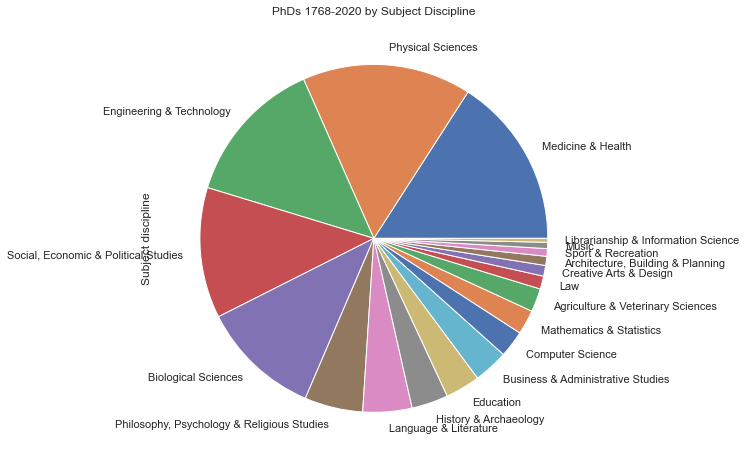

In [16]:
f = plt.figure(figsize=(20,8))
sns.set(style='darkgrid')
df['Subject discipline'].value_counts().plot(kind="pie")
plt.title('PhDs 1768-2020 by Subject Discipline')
plt.show()

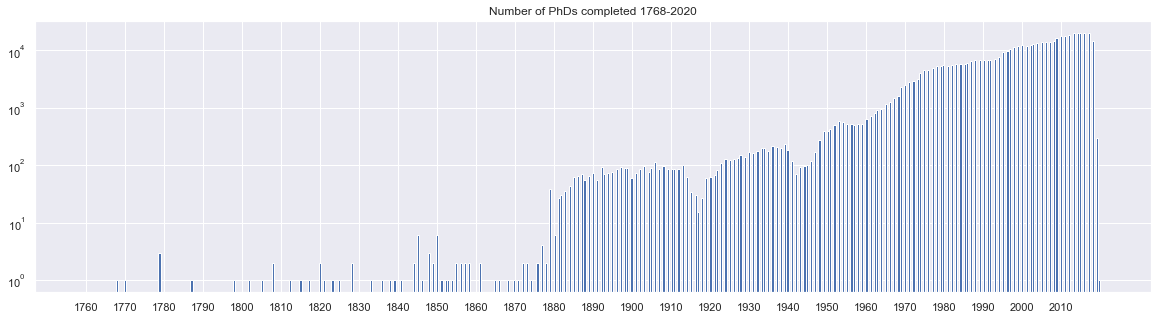

In [17]:
plt.figure(figsize=(20,5))
sns.set(style='darkgrid')
arr=np.array([df['Date']])
bins1=np.histogram_bin_edges(arr,bins='auto',range=(1760, 2020))
plt.hist(df['Date'], bins=bins1, log=True)#need to bin by decade!
plt.xticks(range(1760, 2020,10))
plt.title('Number of PhDs completed 1768-2020')
plt.show()

Clearly, over time, the number of PhDs completed has increased exponentially

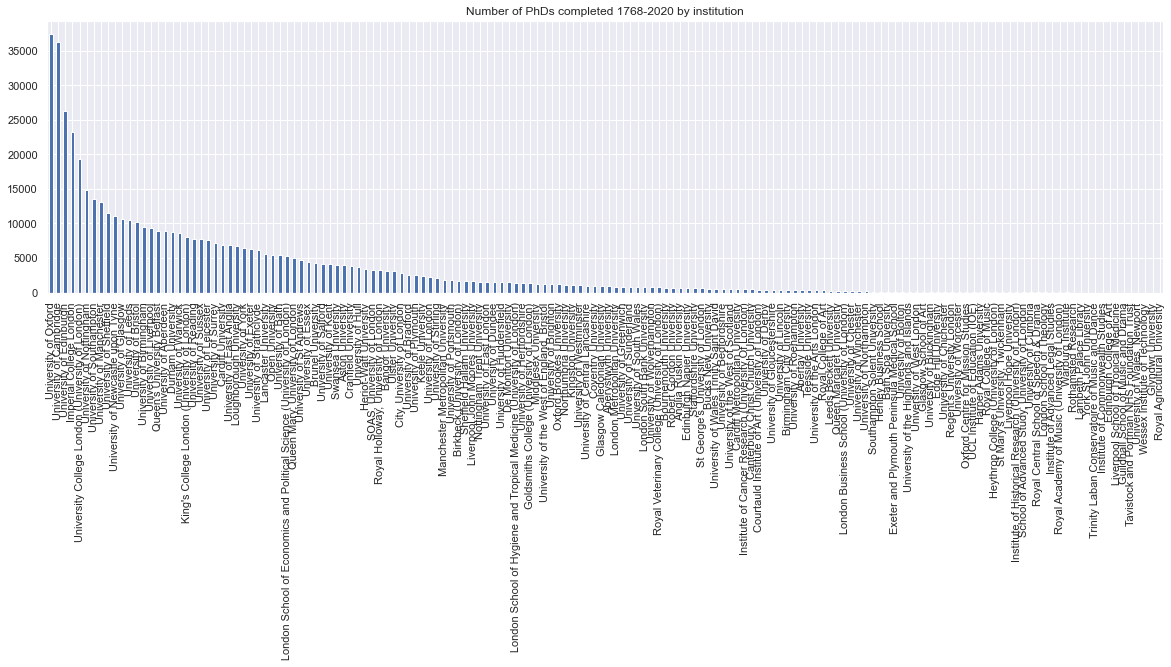

In [18]:
plt.figure(figsize=(20,5))
sns.set(style='darkgrid')
df['Institution'].value_counts().plot(kind="bar")
plt.title('Number of PhDs completed 1768-2020 by institution')
plt.show()

This can further be broken down by subject discipline

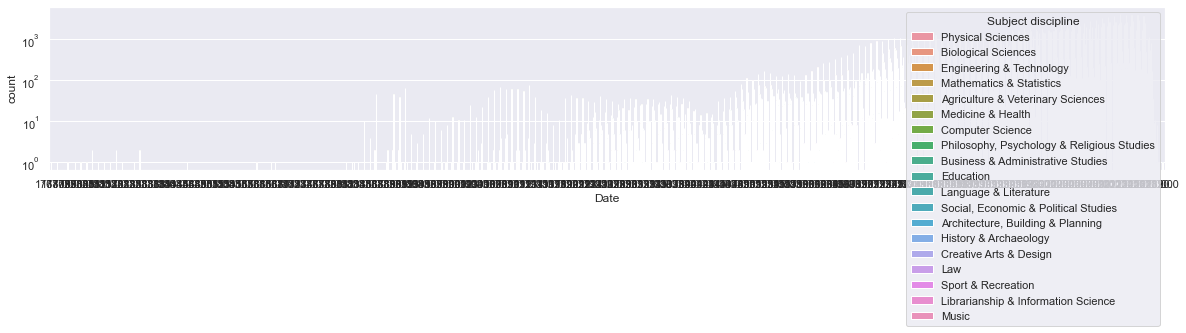

In [19]:
f = plt.figure(figsize=(20,3))
sns.countplot(x="Date", hue="Subject discipline", data=df, log=True)

Breakdown of subject discipline by century:

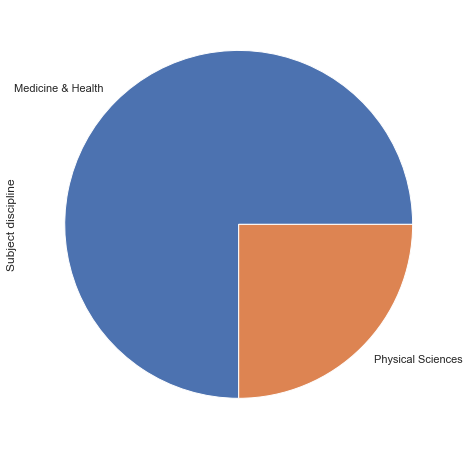

In [20]:
eighteenth = df[df['Date']<=(1800.0)]

f = plt.figure(figsize=(20,8))
sns.set(style='darkgrid')
eighteenth['Subject discipline'].value_counts().plot(kind="pie")
plt.show()

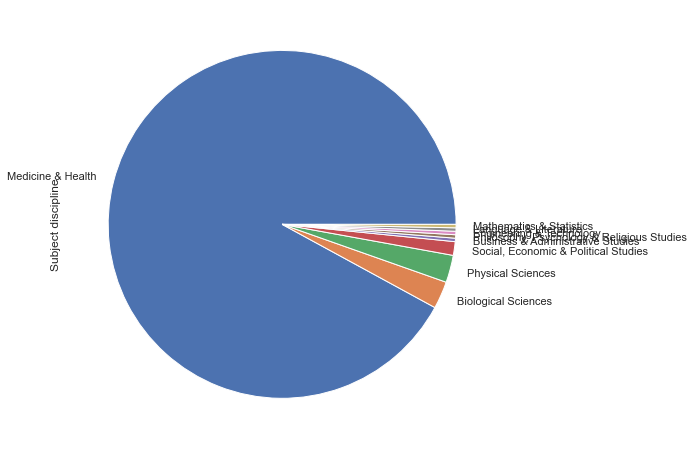

In [21]:
nineteenth = df[(df['Date'] >= 1800.0) & (df['Date'] <= 1900.0)]

f = plt.figure(figsize=(20,8))
sns.set(style='darkgrid')
nineteenth['Subject discipline'].value_counts().plot(kind="pie")
plt.show()

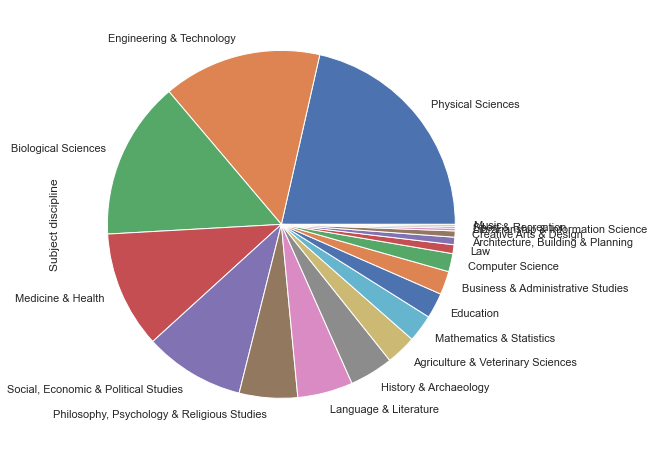

In [22]:
twentieth = df[(df['Date'] >= 1900.0) & (df['Date'] <= 2000.0)]

f = plt.figure(figsize=(20,8))
sns.set(style='darkgrid')
twentieth['Subject discipline'].value_counts().plot(kind="pie")
plt.show()

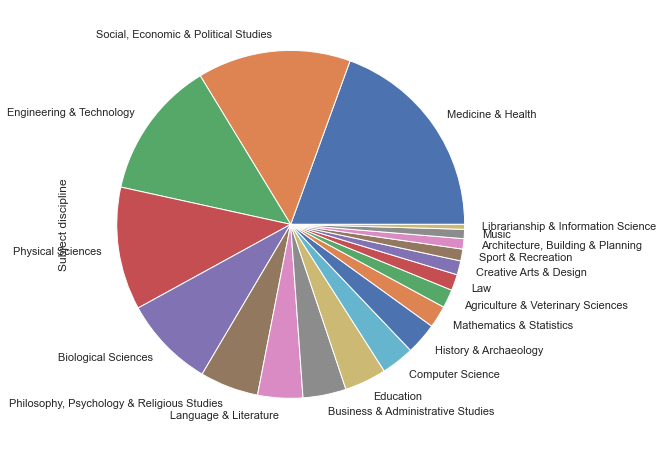

In [23]:
twentyfirst = df[df['Date']>=(2000.0)]

f = plt.figure(figsize=(20,8))
sns.set(style='darkgrid')
twentyfirst['Subject discipline'].value_counts().plot(kind="pie")
plt.show()

Wordcloud

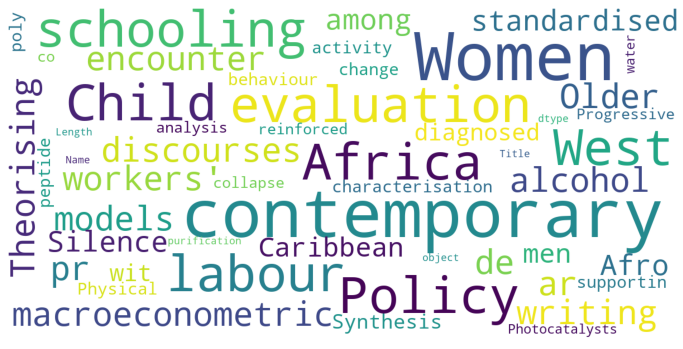

In [24]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=1000,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(twentyfirst['Title'])

2: Data derivation for the construction of predictive models

I will create a new column that contains a cleaned version of the titles, ready for analysis

In [25]:
compsci = df[df['Subject discipline']==('Computer Science')]
titles = compsci.Title
titles

13        A methodology for automated design of computer...
14        Reasoning about the function and timing of int...
57        Learning to classify from temporal data in the...
71        Rational agents and the processes and states o...
78        Optical packet networking using optical time d...
                                ...                        
516109    Safe reinforcement learning using formally ver...
516114    Real-time I/O system for many-core embedded sy...
516115     Automotive mechatronic safety argument framework
516120    Ahead-of-time algebraic compilation for safety...
516419    Anomaly-based network intrusion detection enha...
Name: Title, Length: 12124, dtype: object

In [26]:
title_df = pd.DataFrame({'Title':titles})

# removing everything except alphabets`
title_df['clean_doc'] = title_df['Title'].str.replace("[^a-zA-Z#]", " ")

# removing short words
title_df['clean_doc'] = title_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# make all text lowercase
title_df['clean_doc'] = title_df['clean_doc'].apply(lambda x: x.lower())

In [27]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# tokenization
tokenized_doc = title_df['clean_doc'].apply(lambda x: x.split())

# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(title_df['clean_doc'])

X.shape # check shape of the document-term matrix

(12124, 1000)

In [29]:
from sklearn.decomposition import TruncatedSVD

#SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

len(svd_model.components_)

20

In [30]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
        print(" ")

Topic 0: 
systems
 
based
 
design
 
software
 
analysis
 
using
 
data
 
Topic 1: 
systems
 
distributed
 
control
 
design
 
time
 
real
 
information
 
Topic 2: 
software
 
design
 
development
 
based
 
oriented
 
object
 
computer
 
Topic 3: 
based
 
approach
 
knowledge
 
systems
 
model
 
agent
 
information
 
Topic 4: 
networks
 
software
 
neural
 
development
 
network
 
artificial
 
mobile
 
Topic 5: 
data
 
software
 
development
 
time
 
management
 
mining
 
real
 
Topic 6: 
programming
 
language
 
logic
 
networks
 
software
 
learning
 
systems
 
Topic 7: 
time
 
real
 
based
 
software
 
programming
 
analysis
 
computer
 
Topic 8: 
learning
 
analysis
 
machine
 
using
 
software
 
models
 
recognition
 
Topic 9: 
analysis
 
modelling
 
approach
 
performance
 
information
 
oriented
 
object
 
Topic 10: 
computer
 
modelling
 
control
 
simulation
 
distributed
 
parallel
 
programming
 
Topic 11: 
modelling
 
approach
 
object
 
oriented
 
learning
 
design
 
distr

In [31]:
X_topics = svd_model.fit_transform(X)

In [32]:
import umap
embedding = umap.UMAP(n_neighbors=30, min_dist=0.5, random_state=12).fit_transform(X_topics)

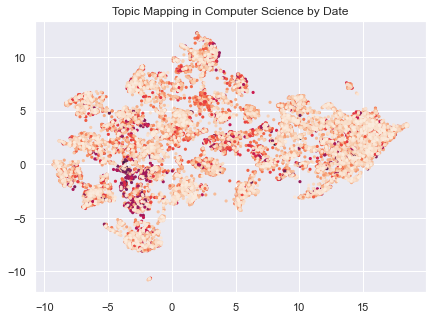

In [33]:
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
s = 10,c=compsci['Date'],
edgecolor='none')
plt.title('Topic Mapping in Computer Science by Date')
plt.show()

Constructing a Naive Bayes Classifier

First, I need to remove my NaN values. I kept them in a separate dataframe so that I can test the trained model on them for visual inspection.

In [34]:
sub = df[df['Subject discipline'].notna()]
nosub = df[df['Subject discipline'].isnull()]

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
sns.set() # use seaborn plotting style

In [36]:
# Get the text categories
text_categories = target_names
# define the training set
train_data = sub
# define the test set
test_data = sub

In [37]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(sub['Title'], sub['Subject discipline'], test_size=0.3, random_state=1)

In [41]:
from sklearn.model_selection import cross_val_score

# Build the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
scores = cross_val_score(model, X_train, y_train, cv=5)
scores
# Train the model using the training data
model.fit(X_train,y_train)
# Predict the categories of the test data
predicted_categories = model.predict(X_test)

In [42]:
print(scores)

[0.60712461 0.60548945 0.60878896 0.6073582  0.60989853]


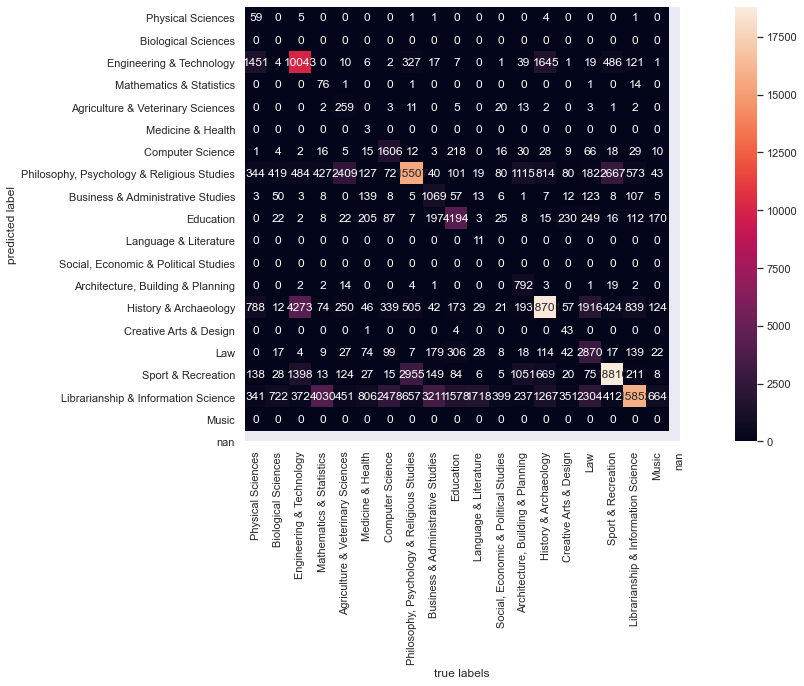

The accuracy is 0.612463890554314


In [43]:
# plot the confusion matrix
f = plt.figure(figsize=(20,8))
mat = confusion_matrix(y_test, predicted_categories)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels=target_names,yticklabels=target_names)
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print("The accuracy is {}".format(accuracy_score(y_test, predicted_categories)))

In [45]:
predicted_categories2 = model.predict(nosub['Title'])

In [52]:
titles2 = nosub['Title']

In [62]:
predicted_categories2=nosub['predicted_categories2']

In [63]:
nosub

,Title,Author,Institution,Date,Qualification,Abstract,Subject discipline,predicted_categories2
47735,The predation strategies and bionomics of thre...,"Giller, Paul Stanley",Imperial College London,1979.0,Thesis (Ph.D.),NaN,NaN,Biological Sciences
50777,The role of prior knowledge in the interpretat...,"Koh, Moy Yin",University College London (University of London),1984.0,Thesis (Ph.D.),NaN,NaN,"Philosophy, Psychology & Religious Studies"
66979,The relations of the British Government with t...,"King, Agnes",University College London (University of London),1931.0,Thesis (Ph.D.),NaN,NaN,"Social, Economic & Political Studies"
84928,Seignorial fortresses in France in relation to...,"Coulson, Charles L. H.",King's College London (University of London),1972.0,Thesis (Ph.D.),NaN,NaN,"Social, Economic & Political Studies"
100462,Aspects of medical education in Britain in the...,"Cunningham, Andrew Robert",University College London (University of London),1974.0,Thesis (Ph.D.),NaN,NaN,History & Archaeology
...,...,...,...,...,...,...,...,...
516498,"Humic acid, its colloidal and solution propert...","Swiech, Weronika M.",University of Surrey,2018.0,Thesis (Eng.D.),This work considers interactions occurring bet...,NaN,Physical Sciences
516499,The persona in instrumental rock,"Sora, Andrei",University of Surrey,2018.0,Thesis (Ph.D.),"There seems to be agreement, in both academic ...",NaN,Physical Sciences
516502,"Theory, application and policy of efficiency r...","Oduro, Richard",University of Surrey,2018.0,Thesis (Ph.D.),There are narratives based on qualitative and ...,NaN,"Social, Economic & Political Studies"
516503,"The corporeosonic composer : corporeality, fee...","Nederberg, Annelie",University of Surrey,2018.0,Thesis (Ph.D.),This artistic inquiry contributes to the field...,NaN,"Social, Economic & Political Studies"


References:
https://www.analyticsvidhya.com/blog/2018/10/stepwise-guide-topic-modeling-latent-semantic-analysis/
https://towardsdatascience.com/text-classification-using-naive-bayes-theory-a-working-example-2ef4b7eb7d5a